In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-pollution/Submission.csv
/kaggle/input/water-pollution/Target.csv
/kaggle/input/water-pollution/Train.csv
/kaggle/input/water-pollution/Test.csv


In [2]:
df = pd.read_csv('/kaggle/input/water-pollution/Train.csv')
df

,Unnamed: 0,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
0,6,CAS_7723-14-0,2009,2009-01--2009-12,ES014MSPFES-014-NR-038-000-02-02,Spain,50941692.0,4.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
1,10,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0220,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2,17,CAS_14265-44-2,2009,2009-01--2009-12,FRGR1496,France,71176346.0,4.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
3,24,CAS_7723-14-0,2009,2009-01--2009-12,FRDR174,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
4,34,CAS_7723-14-0,2009,2009-01--2009-12,FRGR1022,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,19877,CAS_14265-44-2,2009,2009-01--2009-12,UKSC006555,United Kingdom,25867961.0,0.0,0.000000,16.7,2.2,3.5,28.2,18.9,20.2,0.0,2.7,27.25
2314,19890,CAS_7723-14-0,2009,2009-01--2009-12,FRGR0380,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
2315,19895,CAS_14265-44-2,2009,2009-01--2009-12,ES080MSPF18-28,Spain,50941692.0,0.0,87.158924,49.0,8.0,3.0,14.0,15.0,9.0,0.0,0.0,16.84
2316,19899,CAS_7723-14-0,2009,2009-01--2009-12,FRHR251A,France,71176346.0,0.0,0.000000,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [3]:
df.info() # data has no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2318 non-null   int64  
 1   code             2318 non-null   object 
 2   year             2318 non-null   int64  
 3   period           2318 non-null   object 
 4   id               2318 non-null   object 
 5   Country          2318 non-null   object 
 6   tourists         2318 non-null   float64
 7   venue            2318 non-null   float64
 8   rate             2318 non-null   float64
 9   food             2318 non-null   float64
 10  glass            2318 non-null   float64
 11  metal            2318 non-null   float64
 12  other            2318 non-null   float64
 13  paper            2318 non-null   float64
 14  plastic          2318 non-null   float64
 15  leather          2318 non-null   float64
 16  green_waste      2318 non-null   float64
 17  waste_recyclin

In [4]:
df.duplicated().sum() # find duplicated rows

0

In [5]:
# Divide columns by numerical and categorcial

cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Categorcial:\t ',cat_columns, '\n Count = ',len(cat_columns))

print('Numerical:\t ',  num_columns, '\n Count = ',len(num_columns))

Categorcial:	  ['code', 'period', 'id', 'Country'] 
 Count =  4
Numerical:	  ['Unnamed: 0', 'year', 'tourists', 'venue', 'rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling'] 
 Count =  14


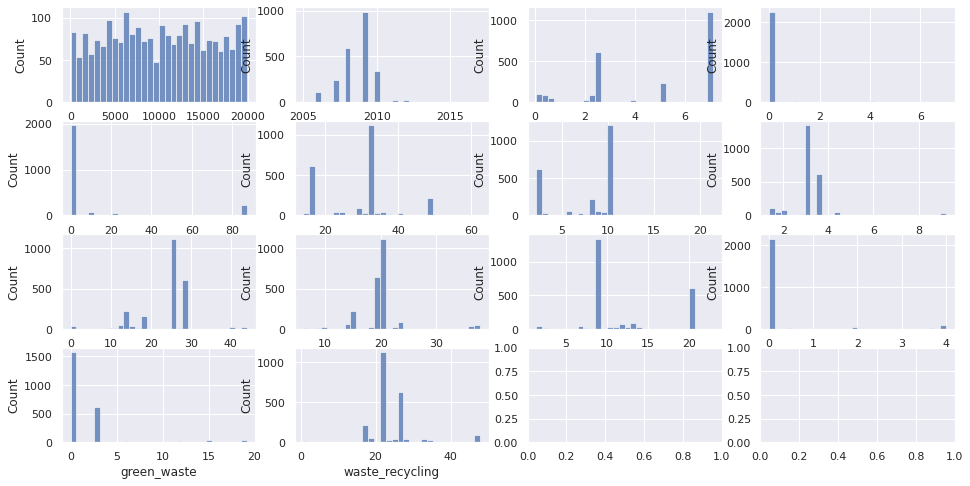

In [6]:
# value distribution by numerical column
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 30);